In [59]:
import numpy as np
import pandas as pd
from PIL import Image
import json
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import StratifiedKFold

In [300]:
img = np.array(Image.open('sample_imgs/KR_001_00d3c7f8ccc506ad83461064362c9969_0379.png'))
img.shape

(973, 2054, 4)

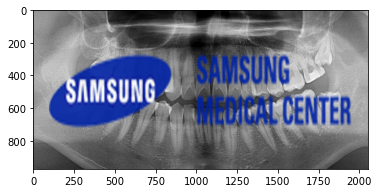

In [301]:
plt.imshow(img)

In [2]:
with open('train_label_sample.json') as f:
    json_data = json.load(f)
json_data

{'KR_001_00d3c7f8ccc506ad83461064362c9969_0379.png': [{'class': 11,
   'coord': [990, 276, 1093, 564]},
  {'class': 12, 'coord': [901, 232, 1004, 558]},
  {'class': 13, 'coord': [804, 204, 913, 561]},
  {'class': 14, 'coord': [720, 226, 851, 536]},
  {'class': 15, 'coord': [614, 210, 761, 518]},
  {'class': 16, 'coord': [479, 177, 648, 491]},
  {'class': 17, 'coord': [336, 154, 527, 446]},
  {'class': 21, 'coord': [1094, 259, 1196, 573]},
  {'class': 22, 'coord': [1192, 258, 1280, 557]},
  {'class': 23, 'coord': [1274, 209, 1379, 570]},
  {'class': 24, 'coord': [1337, 252, 1460, 552]},
  {'class': 25, 'coord': [1431, 236, 1546, 542]},
  {'class': 26, 'coord': [1512, 202, 1668, 506]},
  {'class': 27, 'coord': [1610, 172, 1800, 446]},
  {'class': 28, 'coord': [1720, 122, 1841, 347]},
  {'class': 31, 'coord': [1032, 600, 1102, 833]},
  {'class': 32, 'coord': [1088, 597, 1163, 860]},
  {'class': 33, 'coord': [1158, 589, 1257, 914]},
  {'class': 34, 'coord': [1228, 579, 1376, 865]},
  {'cla

In [3]:
img_data = json_data['KR_001_00d3c7f8ccc506ad83461064362c9969_0379.png']
img_data

[{'class': 11, 'coord': [990, 276, 1093, 564]},
 {'class': 12, 'coord': [901, 232, 1004, 558]},
 {'class': 13, 'coord': [804, 204, 913, 561]},
 {'class': 14, 'coord': [720, 226, 851, 536]},
 {'class': 15, 'coord': [614, 210, 761, 518]},
 {'class': 16, 'coord': [479, 177, 648, 491]},
 {'class': 17, 'coord': [336, 154, 527, 446]},
 {'class': 21, 'coord': [1094, 259, 1196, 573]},
 {'class': 22, 'coord': [1192, 258, 1280, 557]},
 {'class': 23, 'coord': [1274, 209, 1379, 570]},
 {'class': 24, 'coord': [1337, 252, 1460, 552]},
 {'class': 25, 'coord': [1431, 236, 1546, 542]},
 {'class': 26, 'coord': [1512, 202, 1668, 506]},
 {'class': 27, 'coord': [1610, 172, 1800, 446]},
 {'class': 28, 'coord': [1720, 122, 1841, 347]},
 {'class': 31, 'coord': [1032, 600, 1102, 833]},
 {'class': 32, 'coord': [1088, 597, 1163, 860]},
 {'class': 33, 'coord': [1158, 589, 1257, 914]},
 {'class': 34, 'coord': [1228, 579, 1376, 865]},
 {'class': 35, 'coord': [1311, 572, 1496, 870]},
 {'class': 36, 'coord': [1417, 5

In [67]:
list(json_data.keys())

['KR_001_00d3c7f8ccc506ad83461064362c9969_0379.png',
 'KR_001_0280983e8078749475e1b4e918163ef6_1362.png',
 'KR_001_02838a5b91a8b338e2807a6c3de3cb8f_0188.png',
 'KR_001_02cc1ff2b9418179b8ca3fac5649e9dc_0251.png',
 'KR_001_02fb73e9143eb27f4b8373d9873712de_0458.png']

In [6]:
img_data[0]

{'class': 11, 'coord': [990, 276, 1093, 564]}

---

(750, 1550)


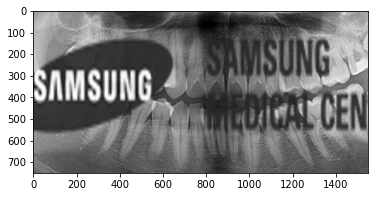

In [251]:
img_gray_crop = np.array(Image.open('sample_imgs/KR_001_00d3c7f8ccc506ad83461064362c9969_0379.png').convert('L').crop((200,150,1750,900)))
print(img_gray_crop.shape)
plt.imshow(img_gray_crop,cmap='gray')

(973, 2054)


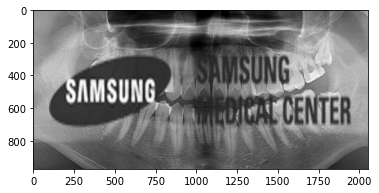

In [252]:
img_gray = np.array(Image.open('sample_imgs/KR_001_00d3c7f8ccc506ad83461064362c9969_0379.png').convert('L'))
print(img_gray.shape)
plt.imshow(img_gray,cmap='gray')

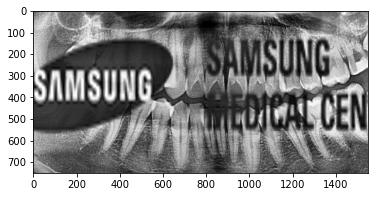

In [253]:
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
img2_crop = clahe.apply(img_gray_crop)
plt.imshow(img2_crop, cmap='gray')

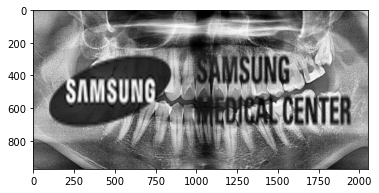

In [254]:
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
img2 = clahe.apply(img_gray)
plt.imshow(img2, cmap='gray')

In [255]:
int(0.035*1911) ; int(0.97*1911) ; int(943*0.073); int(943*0.935)

881

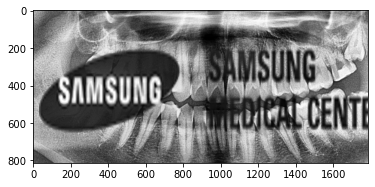

In [256]:
plt.imshow(img2[68:881,66:1853], cmap='gray')

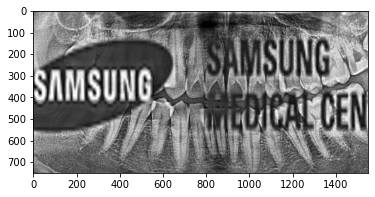

In [257]:
clahe2 = cv2.createCLAHE(clipLimit=2, tileGridSize=(30,30))
img2_2_crop = clahe2.apply(img_gray_crop)
plt.imshow(img2_2_crop, cmap='gray')

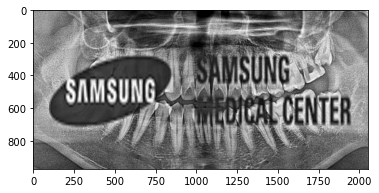

In [258]:
clahe2 = cv2.createCLAHE(clipLimit=2, tileGridSize=(30,30))
img2_2 = clahe2.apply(img_gray)
plt.imshow(img2_2, cmap='gray')

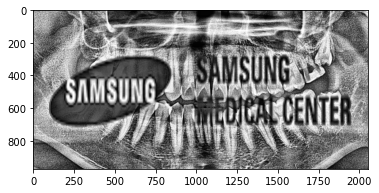

In [259]:
clahe3 = cv2.createCLAHE(clipLimit=2, tileGridSize=(30,30))
img3_2 = clahe3.apply(img_gray)
img4_2 = clahe.apply(img3_2)
plt.imshow(img4_2, cmap='gray')

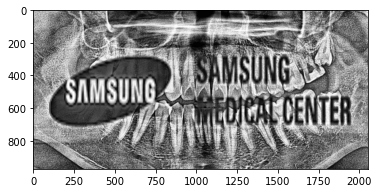

In [260]:
clahe3 = cv2.createCLAHE(clipLimit=2, tileGridSize=(50,50))
img3_2 = clahe3.apply(img_gray)
img4_2 = clahe.apply(img3_2)
plt.imshow(img4_2, cmap='gray')

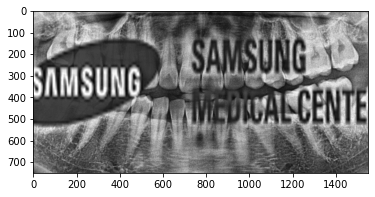

In [94]:
plt.imshow(img2_2[150:900,200:1750], cmap='gray')

(750, 1550, 3)


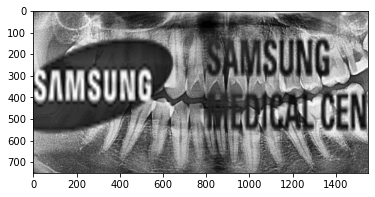

In [261]:
img3_crop = np.dstack((img2_crop,img2_crop,img2_crop))
print(img3_crop.shape)
plt.imshow(img3_crop, cmap='gray')

(973, 2054, 3)


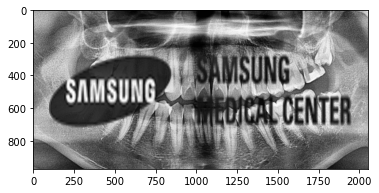

In [262]:
img3 = np.dstack((img2,img2,img2))
print(img3.shape)
plt.imshow(img3, cmap='gray')

In [97]:
np.expand_dims(img_gray, axis=2).shape

(943, 1911, 1)

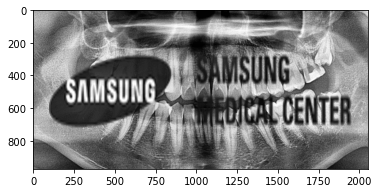

In [263]:
wb = cv2.xphoto.createSimpleWB()
wb.setP(0.4)
img_wb = wb.balanceWhite(img_gray)
img_wb_cl = clahe.apply(img_wb)
plt.imshow(img_wb_cl, cmap='gray')

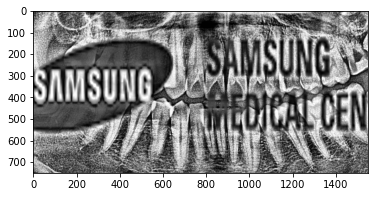

In [264]:
wb = cv2.xphoto.createSimpleWB()
wb.setP(0.4)
img_wb2_crop = wb.balanceWhite(img2_2_crop)
img_wb_cl2_crop = clahe.apply(img_wb2_crop)
plt.imshow(img_wb_cl2_crop , cmap='gray')

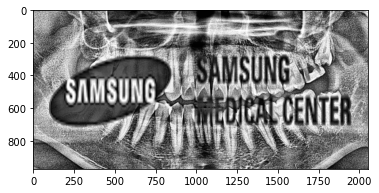

In [265]:
wb = cv2.xphoto.createSimpleWB()
wb.setP(0.4)
img_wb2 = wb.balanceWhite(img2_2)
img_wb_cl2 = clahe.apply(img_wb2)
plt.imshow(img_wb_cl2 , cmap='gray')

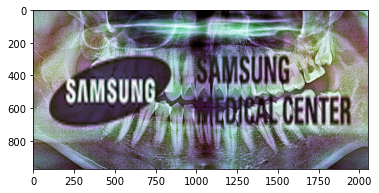

In [266]:
final = np.dstack((img2_2,img2,img_wb_cl2)) # B G R
plt.imshow(final)

(973, 2054, 3)


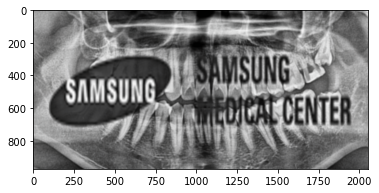

In [267]:
from scipy import ndimage
blurred=ndimage.gaussian_filter(final,sigma=3)
print(blurred.shape)
plt.imshow(blurred)

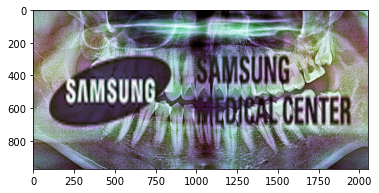

In [268]:
plt.imshow(final)

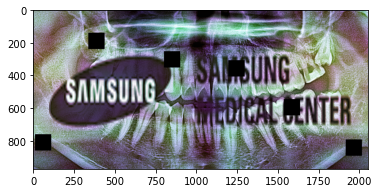

In [375]:
import random
def cutout(img):
    img2 = img.copy()
    h,w = img.shape[0], img.shape[1]
    cutnum = 6
    size = 100
    for num in range(cutnum):
        x_min = random.randint(1,(w-size-1))
        y_min = random.randint(1,(h-size-1))
        img2[y_min:(y_min+size),x_min:(x_min+size),:] = 0
    plt.imshow(img2)
cutout(final)

In [ ]:
int(0.035*1911) ; int(0.97*1911) ; int(943*0.073); int(943*0.935)

51 -22


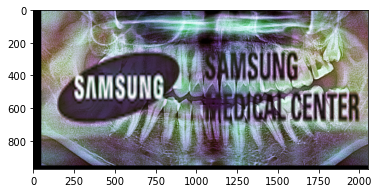

In [270]:
def shift_img(img):
    img2 = img.copy()
    h,w = img.shape[0], img.shape[1]
    side = int(w*(random.uniform(-0.031,0.031)))
    updown = int(h*(random.uniform(-0.06,0.06)))
    print(side, updown)
    if side < 0: 
        img2 = np.concatenate((img2[:,-side:,:],np.zeros((h,-side,3))),axis=1)
    elif side > 0:
        img2 = np.concatenate((np.zeros((h,side,3)),img2[:,:(w-side),:]),axis=1)
    if updown < 0:
        img2 = np.concatenate((img2[-updown:,:,:],np.zeros((-updown,w,3))),axis=0)
    elif updown > 0:
        img2 = np.concatenate((np.zeros((updown,w,3)),img2[:(h-updown),:,:]),axis=0)
    plt.imshow(img2.astype('uint8'))
shift_img(final)

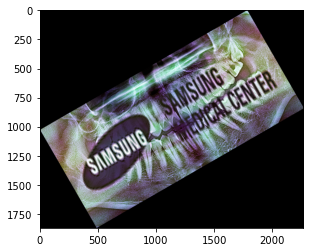

In [271]:
from scipy.ndimage.interpolation import rotate
plt.imshow(rotate(final,angle=30))

In [158]:
import random
random.uniform(-0.03,0.03)

-0.02814962814393996

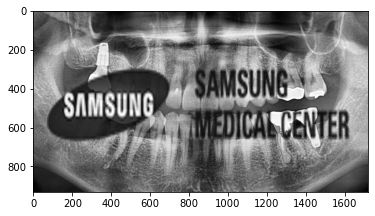

In [107]:
plt.imshow(img3, cmap='gray')

In [58]:
a = [1,2,3]
b = [4,5,6]
pd.DataFrame({'a':a,'b':b})

a  b
0  1  4
1  2  5
2  3  6

In [62]:
a = ['a','b','c','d','e']
b = [11,12,11,13,13]
cv = StratifiedKFold(n_splits=2)
for i, (t,v) in enumerate(cv.split(np.array(a), np.array(b))):
    tr = np.array(a)[t]
tr

C:\Users\User\anaconda3\envs\Python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


array(['a', 'b', 'd'], dtype='<U1')

In [66]:
teeth_labels = [11,12,13,14,15,16,17,18,21,22,23,24,25,26,27,28,31,32,33,34,35,36,37,38,41,42,43,44,45,46,47,48]
teeth_labels.index(47)

30

In [69]:
a = 'ㄹㅇㄹㅇ/ㄹㅇㄹㅇ/ㅐㅐ/ㅐㅡㅐ.png'
a.split('/')[-1].split('.')[0]

'ㅐㅡㅐ'

In [75]:
np.concatenate((np.array(['a','b']), np.array(['df'])))

array(['a', 'b', 'df'], dtype='<U2')

(943, 1911, 4)


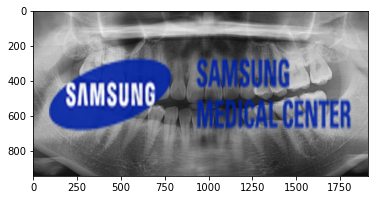

In [210]:
img_rgb= np.array(Image.open('sample_imgs/KR_001_02cc1ff2b9418179b8ca3fac5649e9dc_0251.PNG'))
print(img_rgb.shape)
plt.imshow(img_rgb)

(943, 1911, 3)


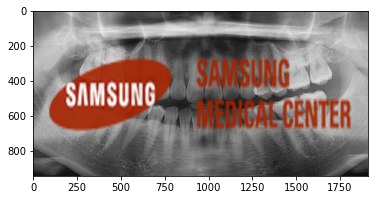

In [211]:
img_rgb= cv2.imread('sample_imgs/KR_001_02cc1ff2b9418179b8ca3fac5649e9dc_0251.PNG')
print(img_rgb.shape)
plt.imshow(img_rgb)

In [272]:
def coord_to_yolo(coords,H,W):
    x_min, x_max, y_min, y_max = coords[0], coords[2], coords[1], coords[3]
    center_x, center_y = (x_max+x_min)/2, (y_max+y_min)/2
    center_x_yolo, center_y_yolo = center_x/W, center_y/H
    width_yolo, height_yolo = (x_max-x_min)/W, (y_max-y_min)/H
    return [center_x_yolo, center_y_yolo, width_yolo, height_yolo]

def yoloFormattocv(x1, y1, x2, y2, H, W):
    bbox_width = x2 * W
    bbox_height = y2 * H
    center_x = x1 * W
    center_y = y1 * H

    voc = []

    voc.append(center_x - (bbox_width / 2))
    voc.append(center_y - (bbox_height / 2))
    voc.append(center_x + (bbox_width / 2))
    voc.append(center_y + (bbox_height / 2))

    return [int(v) for v in voc]

class yoloRotatebbox:
    def __init__(self, image, coord_ls, angle):
        self.image = image
        self.angle = angle
        self.coord_ls = coord_ls

        rotation_angle = self.angle * np.pi / 180
        self.rot_matrix = np.array(
            [[np.cos(rotation_angle), -np.sin(rotation_angle)], [np.sin(rotation_angle), np.cos(rotation_angle)]])

    def rotateYolobbox(self):

        new_height, new_width = self.rotate_image().shape[:2]
        new_bbox = []
        H, W = self.image.shape[:2]

        for coords in self.coord_ls:
            bbox = coord_to_yolo(coords['coord'],H,W)
            if len(bbox) > 1:
                (center_x, center_y, bbox_width, bbox_height) = yoloFormattocv(float(bbox[0]), float(bbox[1]),
                                                                               float(bbox[2]), float(bbox[3]), H, W)

                upper_left_corner_shift = (center_x - W / 2, -H / 2 + center_y)
                upper_right_corner_shift = (bbox_width - W / 2, -H / 2 + center_y)
                lower_left_corner_shift = (center_x - W / 2, -H / 2 + bbox_height)
                lower_right_corner_shift = (bbox_width - W / 2, -H / 2 + bbox_height)

                new_lower_right_corner = [-1, -1]
                new_upper_left_corner = []

                for i in (upper_left_corner_shift, upper_right_corner_shift, lower_left_corner_shift,
                          lower_right_corner_shift):
                    new_coords = np.matmul(self.rot_matrix, np.array((i[0], -i[1])))
                    x_prime, y_prime = new_width / 2 + new_coords[0], new_height / 2 - new_coords[1]
                    if new_lower_right_corner[0] < x_prime:
                        new_lower_right_corner[0] = x_prime
                    if new_lower_right_corner[1] < y_prime:
                        new_lower_right_corner[1] = y_prime

                    if len(new_upper_left_corner) > 0:
                        if new_upper_left_corner[0] > x_prime:
                            new_upper_left_corner[0] = x_prime
                        if new_upper_left_corner[1] > y_prime:
                            new_upper_left_corner[1] = y_prime
                    else:
                        new_upper_left_corner.append(x_prime)
                        new_upper_left_corner.append(y_prime)
                #             print(x_prime, y_prime)

                new_bbox.append([new_upper_left_corner[0], new_upper_left_corner[1],
                                 new_lower_right_corner[0], new_lower_right_corner[1]])

        return new_bbox

    def rotate_image(self):
        """
        Rotates an image (angle in degrees) and expands image to avoid cropping
        """
        height, width = self.image.shape[:2]  # image shape has 3 dimensions
        image_center = (width / 2,
                        height / 2)  # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape

        rotation_mat = cv2.getRotationMatrix2D(image_center, self.angle, 1.)

        # rotation calculates the cos and sin, taking absolutes of those.
        abs_cos = abs(rotation_mat[0, 0])
        abs_sin = abs(rotation_mat[0, 1])

        # find the new width and height bounds
        bound_w = int(height * abs_sin + width * abs_cos)
        bound_h = int(height * abs_cos + width * abs_sin)

        # subtract old image center (bringing image back to origin) and adding the new image center coordinates
        rotation_mat[0, 2] += bound_w / 2 - image_center[0]
        rotation_mat[1, 2] += bound_h / 2 - image_center[1]

        # rotate image with the new bounds and translated rotation matrix
        rotated_mat = cv2.warpAffine(self.image, rotation_mat, (bound_w, bound_h))
        return rotated_mat

In [273]:
img_data

[{'class': 11, 'coord': [990, 276, 1093, 564]},
 {'class': 12, 'coord': [901, 232, 1004, 558]},
 {'class': 13, 'coord': [804, 204, 913, 561]},
 {'class': 14, 'coord': [720, 226, 851, 536]},
 {'class': 15, 'coord': [614, 210, 761, 518]},
 {'class': 16, 'coord': [479, 177, 648, 491]},
 {'class': 17, 'coord': [336, 154, 527, 446]},
 {'class': 21, 'coord': [1094, 259, 1196, 573]},
 {'class': 22, 'coord': [1192, 258, 1280, 557]},
 {'class': 23, 'coord': [1274, 209, 1379, 570]},
 {'class': 24, 'coord': [1337, 252, 1460, 552]},
 {'class': 25, 'coord': [1431, 236, 1546, 542]},
 {'class': 26, 'coord': [1512, 202, 1668, 506]},
 {'class': 27, 'coord': [1610, 172, 1800, 446]},
 {'class': 28, 'coord': [1720, 122, 1841, 347]},
 {'class': 31, 'coord': [1032, 600, 1102, 833]},
 {'class': 32, 'coord': [1088, 597, 1163, 860]},
 {'class': 33, 'coord': [1158, 589, 1257, 914]},
 {'class': 34, 'coord': [1228, 579, 1376, 865]},
 {'class': 35, 'coord': [1311, 572, 1496, 870]},
 {'class': 36, 'coord': [1417, 5

In [274]:
im = yoloRotatebbox(final, img_data, angle=-15)
bbox = im.rotateYolobbox()
image = im.rotate_image()

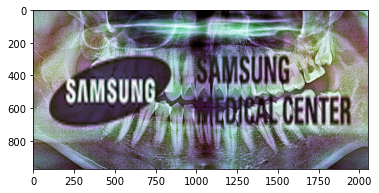

In [275]:
plt.imshow(final)

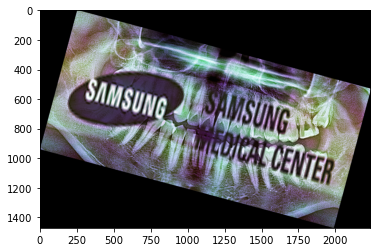

In [276]:
plt.imshow(image)

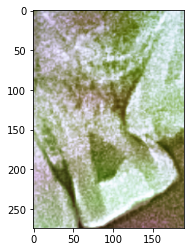

In [286]:
plt.imshow(final[172:446,1610:1800,:])

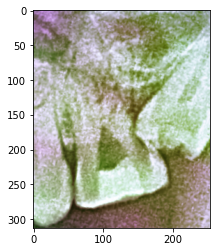

In [289]:
plt.imshow(image[582:896,1691:1945,:])

In [284]:
img_data[13]

{'class': 27, 'coord': [1610, 172, 1800, 446]}

In [287]:
bbox[13]

[1691.116928053179, 582.6078309268576, 1945.5592534061925, 896.4471258995412]

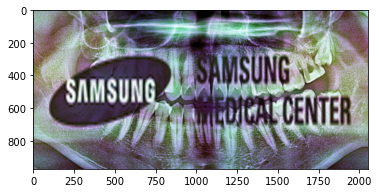

In [388]:
import albumentations as A

transform = A.Compose([
    A.GaussianBlur(p=0.9),
    A.RandomGamma(gamma_limit=(90,110), p=0.9)])

transformed = transform(image=final)
transformed_image = transformed["image"]
plt.imshow(transformed_image)

In [389]:
transformed_image.shape

(973, 2054, 3)

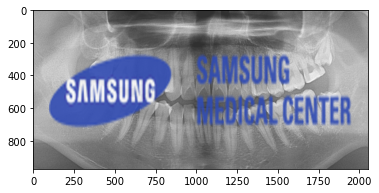

In [307]:
transform = A.Compose([
    A.RandomBrightnessContrast(p=0.8)
], bbox_params=A.BboxParams(format='yolo'))

transformed = transform(image=img)
transformed_image = transformed["image"]
plt.imshow(transformed_image)

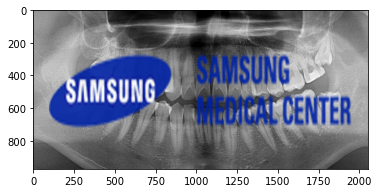

In [304]:
plt.imshow(img)

In [393]:
len(set([1,2,3])&set([1,6,7]))

1

In [395]:
round(2.9)

3

In [396]:
random.uniform(-0.45,0.45)

-0.1951303706754829

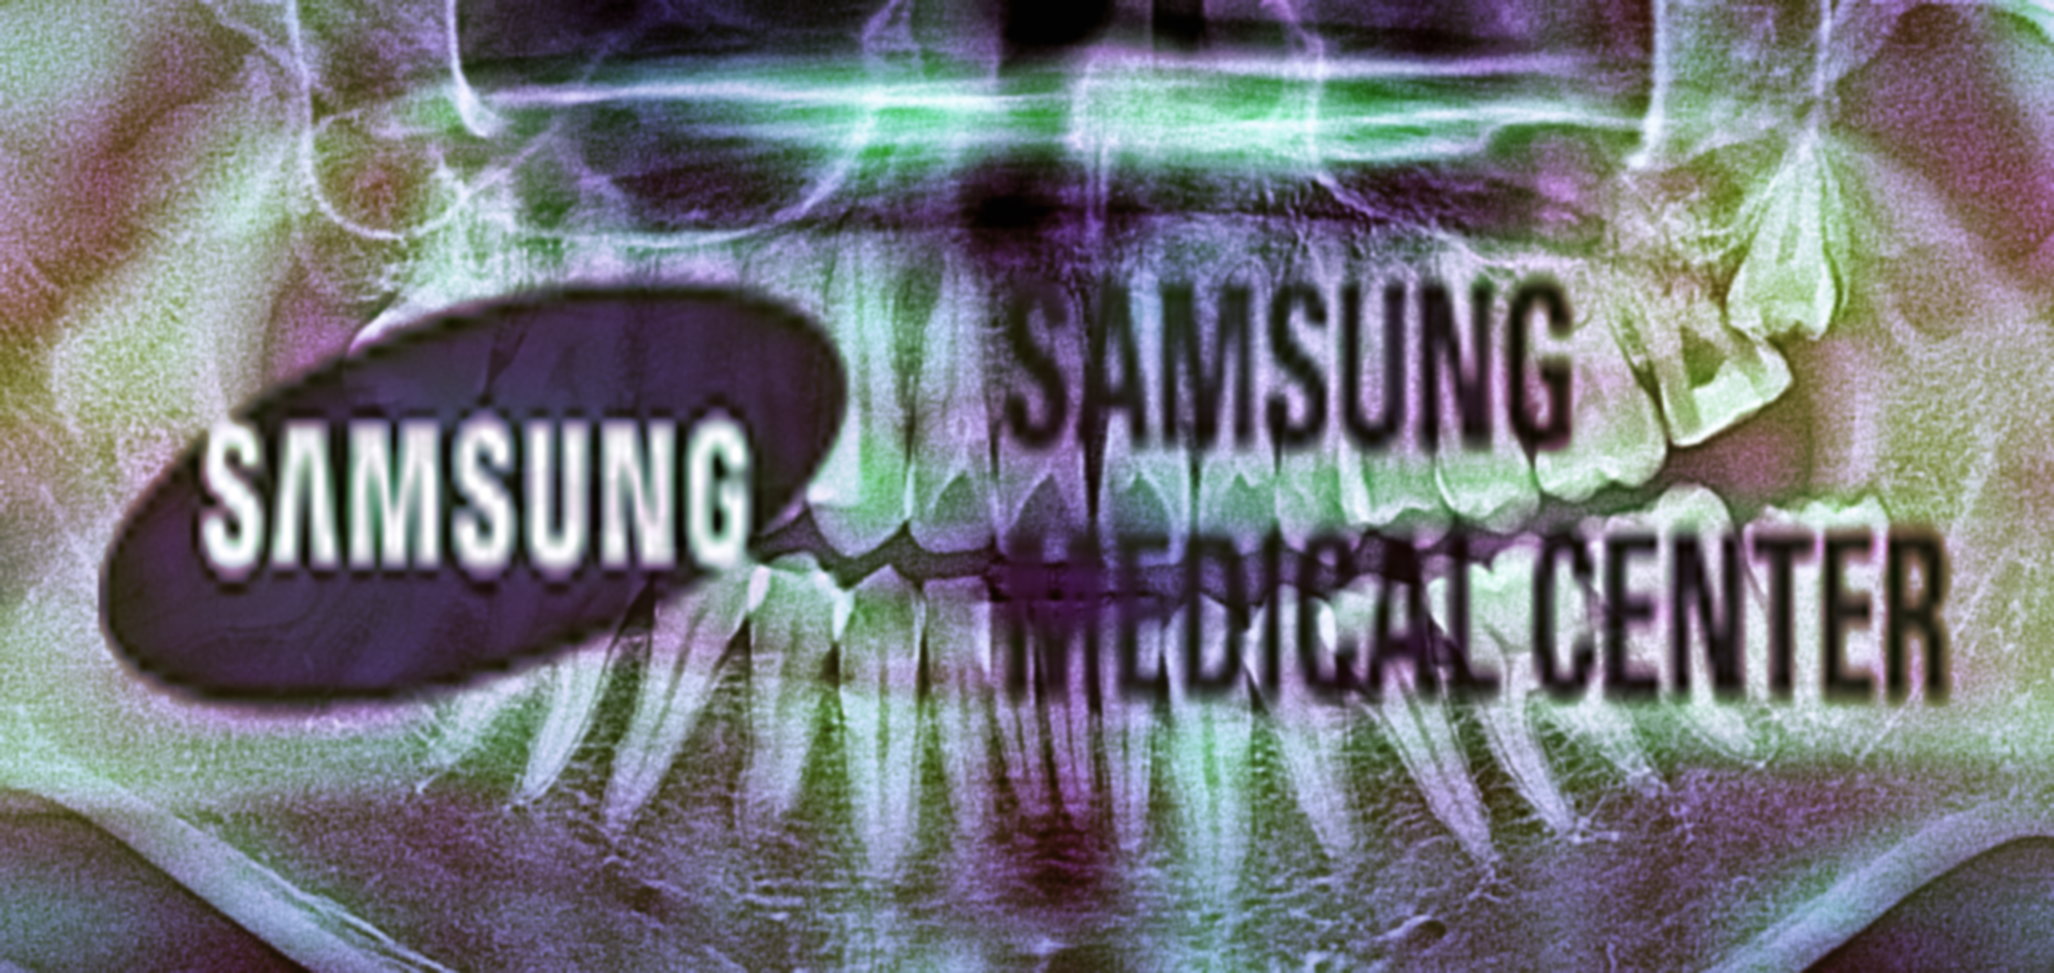

In [398]:
Image.fromarray(transformed_image)

In [399]:
for num in range(1):
    print(num)

0


In [411]:
a = [1,2,3,2,5,6]
list(set(a))

[1, 2, 3, 5, 6]

In [416]:
a.index(2)

1

In [420]:
b = np.where(np.array(a) == 2)[0]
b

array([1, 3], dtype=int64)

In [421]:
np.array(a)[b]

array([2, 2])

In [423]:
np.array([2,-1,4,2,1,3]).argmax()

2

In [427]:
b

array([1, 3], dtype=int64)